<a href="https://colab.research.google.com/github/ironhide554/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline

In [37]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [38]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
df.shape

(284807, 31)

In [40]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [41]:
# Getting the information about my dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [42]:
# Checking of the dataset if it contains any NULL value
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [43]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
# Here in our dataset all the values are normalized but Amount column's data is not scaled so we need to use StandardScaler for this
from sklearn.preprocessing import StandardScaler

In [45]:
sc= StandardScaler()
df["Amount"] = sc.fit_transform(pd.DataFrame(df["Amount"]))

In [46]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [47]:
df = df.drop(["Time"],axis = 1) # We don't require this Time Column

In [48]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [49]:
# Here we can see that our dataset is having some duplicate values so we need to drop that also.
df.duplicated().any()

True

In [50]:
df = df.drop_duplicates()

In [51]:
df.shape

(275663, 30)

# Unbalanced Dataset

In [78]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

0.001718812456847996
Fraud Cases: 473
Valid Transactions: 275190


<Axes: xlabel='Class', ylabel='count'>

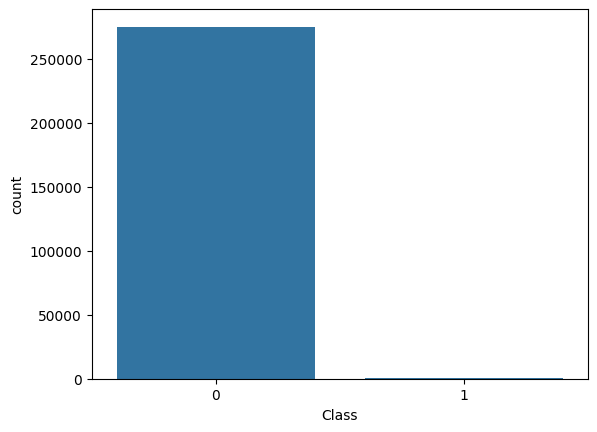

In [54]:
# As we can see that our data is highly imbalanced it means there is an uneven distribution of data in target class.
sns.countplot(data=df, x="Class")

In [55]:
X = df.drop('Class',axis=1)
y = df['Class']

In [56]:
# Splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3  ,random_state = 42)


In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression()

In [60]:
y_pred = lr.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
acc = accuracy_score(y_test , y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test , y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test , y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test , y_pred)
print("The F1-Score is {}".format(f1))

The accuracy is 0.9991293727856443
The precision is 0.8478260869565217
The recall is 0.5735294117647058
The F1-Score is 0.6842105263157895


In [67]:
print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.85      0.57      0.68       136

    accuracy                           1.00     82699
   macro avg       0.92      0.79      0.84     82699
weighted avg       1.00      1.00      1.00     82699



## As we can see that precision , recall and f1 score is deviating from the accuracy , it is bacause of imbalanced data set so first of all we need to make it balanced.


#Balancing of dataset


1.   Undersampling
2.   Oversampling



In [79]:
valid.shape # contains all the valid transactions

(275190, 30)

In [80]:
fraud.shape # oontains all fraudulent transactions

(473, 30)

In [82]:
valid_sample= valid.sample(n=473)
valid_sample.shape

(473, 30)

In [85]:
new_df = pd.concat([valid_sample,fraud],ignore_index = True)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.106289,-0.242992,-1.688131,-0.052027,0.569848,0.113203,-0.100574,0.061873,0.567594,0.280167,...,-0.331859,-0.963060,0.248975,-0.392275,-0.215625,0.216174,-0.090466,-0.077341,-0.349671,0
1,-0.536039,1.507575,0.618012,0.486380,0.800610,-0.429433,0.724586,-1.017817,-0.563055,-0.538544,...,0.762752,-0.163280,-0.252646,-0.164309,0.236510,-0.399123,-0.211629,-0.166580,-0.349231,0
2,-2.893898,-1.044533,1.710436,-0.853603,-0.527809,-0.582606,-1.218138,0.544374,0.887336,-0.382065,...,0.227163,0.759738,-0.262655,0.097397,-0.024604,0.891591,-0.780783,0.423104,-0.353029,0
3,1.098050,0.061370,-0.011226,0.408724,-0.016833,-0.453563,0.295120,-0.038819,-0.420952,0.052573,...,-0.276217,-0.960546,0.121176,0.001553,0.156274,0.146295,-0.062457,0.004259,-0.121740,0
4,-0.695500,1.458249,-0.344798,-0.037514,2.287602,0.220723,1.588210,0.000628,-1.223165,-1.215745,...,-0.041709,-0.108790,-0.740074,-0.475653,1.399705,-0.354823,0.013585,0.059698,-0.288340,0


In [131]:
# Now we are building a logistic regression model after undersampling
X = new_df.drop('Class',axis=1)
y = new_df['Class']

In [132]:
# Splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3  ,random_state = 42)

In [133]:
lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression()

In [134]:
y_pred1 = lr.predict(X_test)

In [135]:
acc = accuracy_score(y_test , y_pred1)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test , y_pred1)
print("The precision is {}".format(prec))

rec = recall_score(y_test , y_pred1)
print("The recall is {}".format(rec))

f1 = f1_score(y_test , y_pred1)
print("The F1-Score is {}".format(f1))

The accuracy is 0.9330985915492958
The precision is 0.9432624113475178
The recall is 0.9236111111111112
The F1-Score is 0.9333333333333333


In [136]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.94      0.92      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



## As we can see that after undersampling the results are extraordinary.

#Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [138]:
y_pred2 = rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test , y_pred2)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test , y_pred2)
print("The precision is {}".format(prec))

rec = recall_score(y_test , y_pred2)
print("The recall is {}".format(rec))

f1 = f1_score(y_test , y_pred2)
print("The F1-Score is {}".format(f1))

The accuracy is 0.926056338028169
The precision is 0.9300699300699301
The recall is 0.9236111111111112
The F1-Score is 0.926829268292683


In [140]:
print(classification_report(y_test , y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       140
           1       0.93      0.92      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



In [141]:
visualization = pd.DataFrame({'Models':['LR','RF'],"ACC":[accuracy_score(y_test,y_pred1)*100,
                                                               accuracy_score(y_test,y_pred2)*100]})

In [142]:
visualization

,Models,ACC
0,LR,93.309859
1,RF,92.605634


<Axes: xlabel='Models', ylabel='ACC'>

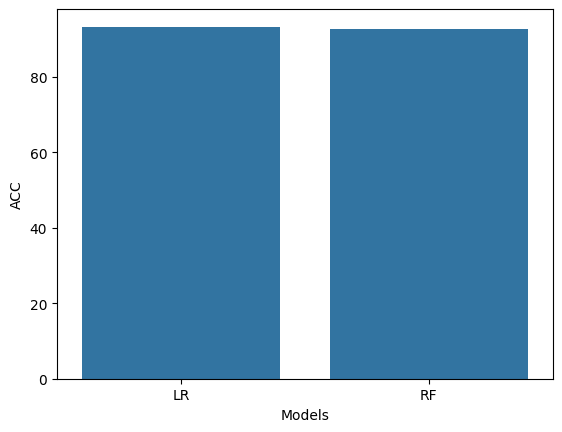

In [143]:
sns.barplot(x= visualization["Models"], y= visualization["ACC"])

In [154]:
import joblib
joblib.dump(lr,"Credit_Card_Detection")

['Credit_Card_Detection']

In [155]:
model = joblib.load("Credit_Card_Detection")

In [157]:
prediction  = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [158]:
if prediction==0:
  print("Valid Transaction")
else:
  print("Fraud Transaction")



Valid Transaction
